In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import requests
from bs4 import BeautifulSoup
# Read the combined wine data CSV file into a DataFrame
wine_clean_df = pd.read_csv('combined_wine_data.csv')

# Calculate null values and percentages for wine_clean_df
null_counts = wine_clean_df.isnull().sum()
null_percentages = (null_counts / len(wine_clean_df)) * 100
null_summary = pd.concat([null_counts, null_percentages], axis=1)
null_summary.columns = ['Null Values', 'Percentage']
null_summary = null_summary.sort_values(by='Null Values', ascending=False)

print("Null values and percentages for wine_clean_df:")
print(null_summary)

Null values and percentages for wine_clean_df:
                    Null Values  Percentage
reviews.rating              445   10.798350
descriptions                233    5.653967
reviews.title                82    1.989808
brand                        65    1.577287
reviews.text                  2    0.048532
reviews.username              2    0.048532
reviews.sourceURLs            0    0.000000
sourceURLs                    0    0.000000
keys                          0    0.000000
name                          0    0.000000
reviews.dateAdded             0    0.000000


In [5]:
# Check the type of variables (numeric or categorical)
variable_types = wine_clean_df.dtypes

print("Variable Types:")
print(variable_types)

Variable Types:
brand                  object
reviews.rating        float64
reviews.sourceURLs     object
reviews.text           object
reviews.title          object
reviews.username       object
sourceURLs             object
keys                   object
name                   object
descriptions           object
reviews.dateAdded      object
dtype: object


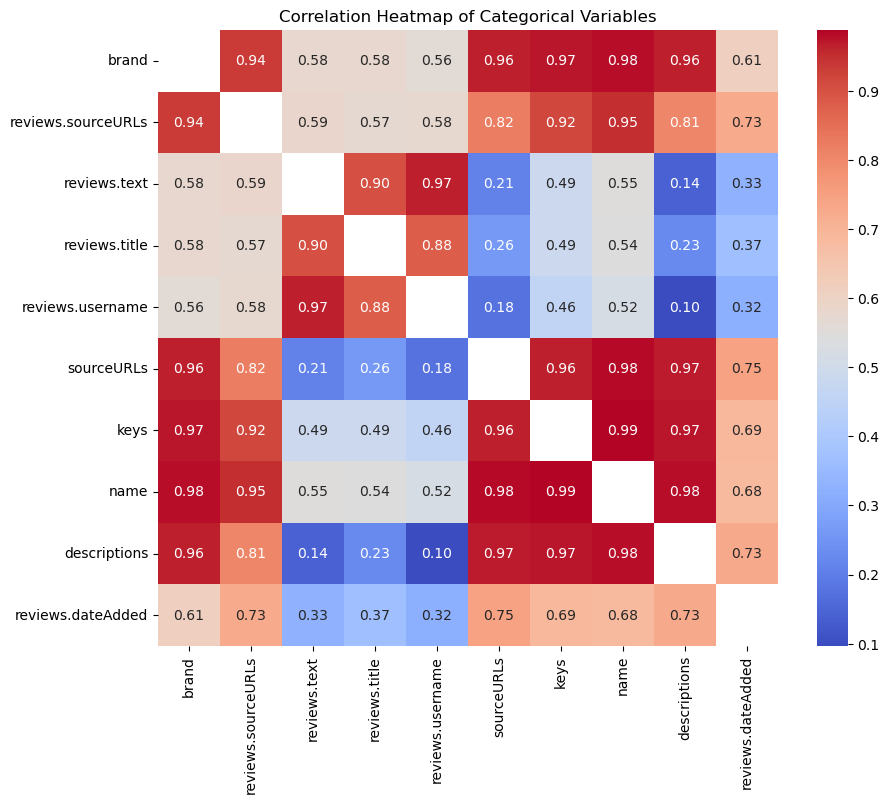

In [6]:
# Extract categorical columns
categorical_cols = wine_clean_df.select_dtypes(include=['object']).columns

# Define a function to calculate Cramér's V for categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a correlation matrix for categorical variables using Cramér's V
categorical_corr_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
            correlation = cramers_v(wine_clean_df[col1], wine_clean_df[col2])
            categorical_corr_matrix.loc[col1, col2] = correlation

# Plot correlation heatmap for categorical variables
plt.figure(figsize=(10, 8))
sns.heatmap(categorical_corr_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Categorical Variables')
plt.show()

In [7]:
# Calculate the mean review rating for each brand
brand_mean_ratings = wine_clean_df.groupby('brand')['reviews.rating'].mean()

# Replace missing values in 'reviews.rating' based on brand's review rating mean
wine_clean_df['reviews.rating'] = wine_clean_df.apply(
    lambda row: row['reviews.rating'] if not pd.isnull(row['reviews.rating']) else brand_mean_ratings[row['brand']], axis=1)

# Verify if there are any remaining missing values
remaining_null_values = wine_clean_df['reviews.rating'].isnull().sum()
print("Number of remaining null values in 'reviews.rating':", remaining_null_values)

Number of remaining null values in 'reviews.rating': 210


In [8]:
# Fill remaining null values in 'reviews.rating' with the overall mean rating
overall_mean_rating = wine_clean_df['reviews.rating'].mean()
wine_clean_df['reviews.rating'].fillna(overall_mean_rating, inplace=True)

# Verify if there are any remaining missing values
remaining_null_values = wine_clean_df['reviews.rating'].isnull().sum()
print("Number of remaining null values in 'reviews.rating':", remaining_null_values)

Number of remaining null values in 'reviews.rating': 0


In [9]:
# Drop rows with null values in the specified columns
wine_clean_df.dropna(subset=['reviews.title', 'brand', 'reviews.text', 'reviews.username'], inplace=True)

# Display the resulting DataFrame dimensions (rows and columns)
print("Dimensions after dropping rows with null values:")
print("Rows:", wine_clean_df.shape[0])
print("Columns:", wine_clean_df.shape[1])

Dimensions after dropping rows with null values:
Rows: 3970
Columns: 11


In [22]:
# Assuming wine_clean_df is your DataFrame
wine_clean_df['reviews.dateAdded'] = pd.to_datetime(wine_clean_df['reviews.dateAdded']).dt.date

# Display the DataFrame after conversion
print(wine_clean_df.head())

             brand  reviews.rating  \
0            Gallo             5.0   
1  Fresh Craft Co.             5.0   
2     1000 Stories             5.0   
3     1000 Stories             5.0   
4     Wine Cube153             5.0   

                                  reviews.sourceURLs  \
0  https://redsky.target.com/groot-domain-api/v1/...   
1  https://redsky.target.com/groot-domain-api/v1/...   
2  https://redsky.target.com/groot-domain-api/v1/...   
3  https://redsky.target.com/groot-domain-api/v1/...   
4  https://redsky.target.com/groot-domain-api/v1/...   

                                        reviews.text  \
0      This a fantastic white wine for any occasion!   
1   Tart, not sweet...very refreshing and delicious!   
2  I was given this wine so it was a delightful s...   
3  This is a phenomenal wine and my new favorite ...   
4  4 750ml bottles for the price of two With way ...   

                          reviews.title reviews.username  \
0                My Favorite White Wi

In [10]:
# Calculate null values and percentages for wine_clean_df
null_counts = wine_clean_df.isnull().sum()
null_percentages = (null_counts / len(wine_clean_df)) * 100
null_summary = pd.concat([null_counts, null_percentages], axis=1)
null_summary.columns = ['Null Values', 'Percentage']
null_summary = null_summary.sort_values(by='Null Values', ascending=False)

print("Null values and percentages for wine_clean_df:")
print(null_summary)

Null values and percentages for wine_clean_df:
                    Null Values  Percentage
descriptions                167    4.206549
brand                         0    0.000000
reviews.rating                0    0.000000
reviews.sourceURLs            0    0.000000
reviews.text                  0    0.000000
reviews.title                 0    0.000000
reviews.username              0    0.000000
sourceURLs                    0    0.000000
keys                          0    0.000000
name                          0    0.000000
reviews.dateAdded             0    0.000000


In [11]:
def classify_wine_type(row):
    red_wine_keywords = ['red', 'cabernet', 'merlot', 'pinot noir', 'malbec', 'shiraz', 'syrah']
    white_wine_keywords = ['white', 'chardonnay', 'sauvignon blanc', 'riesling', 'pinot gris', 'pinot grigio']
    
    if pd.isnull(row['keys']) and pd.isnull(row['name']) and pd.isnull(row['descriptions']):
        return 'unknown'
    
    red_condition = any(keyword in row['keys'].lower() for keyword in red_wine_keywords) or \
                    any(keyword in row['name'].lower() for keyword in red_wine_keywords) or \
                    (pd.notnull(row['descriptions']) and any(keyword in row['descriptions'].lower() for keyword in red_wine_keywords))
    
    white_condition = any(keyword in row['keys'].lower() for keyword in white_wine_keywords) or \
                      any(keyword in row['name'].lower() for keyword in white_wine_keywords) or \
                      (pd.notnull(row['descriptions']) and any(keyword in row['descriptions'].lower() for keyword in white_wine_keywords))
    
    if red_condition:
        return 'red'
    elif white_condition:
        return 'white'
    else:
        return 'unknown'

# Apply classification function to create 'wine_type' column
wine_clean_df['wine_type'] = wine_clean_df.apply(classify_wine_type, axis=1)

# Display the number of wines classified as 'unknown'
unknown_count = (wine_clean_df['wine_type'] == 'unknown').sum()
print("Number of wines classified as 'unknown':", unknown_count)

Number of wines classified as 'unknown': 596


In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

# Separate the dataset into two parts: known and unknown wine types
known_wines = wine_clean_df[wine_clean_df['wine_type'] != 'unknown']
unknown_wines = wine_clean_df[wine_clean_df['wine_type'] == 'unknown']

# Combine known and unknown wines for one-hot encoding
all_wines = pd.concat([known_wines, unknown_wines])

# One-hot encode the 'name' and 'keys' columns
one_hot_encoded_wines = pd.get_dummies(all_wines[['name', 'keys']])

# Split the one-hot encoded DataFrame back into known and unknown wines
one_hot_encoded_known_wines = one_hot_encoded_wines.iloc[:len(known_wines)]
one_hot_encoded_unknown_wines = one_hot_encoded_wines.iloc[len(known_wines):]

# Prepare the features and target variable for training
X_train = one_hot_encoded_known_wines
y_train = known_wines['wine_type']

# Train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Prepare the features for prediction (from unknown wines)
X_pred = one_hot_encoded_unknown_wines

# Predict the wine types for the unknown wines
predicted_types = dt_classifier.predict(X_pred)

# Update the 'wine_type' column in the original DataFrame with the predicted values
wine_clean_df.loc[wine_clean_df['wine_type'] == 'unknown', 'wine_type'] = predicted_types

# Print the count of wines after imputation
print("Count of red wines after imputation:", (wine_clean_df['wine_type'] == 'red').sum())
print("Count of white wines after imputation:", (wine_clean_df['wine_type'] == 'white').sum())

Count of red wines after imputation: 3898
Count of white wines after imputation: 72


In [15]:
wine_clean_df.head()

,brand,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,keys,name,descriptions,reviews.dateAdded,wine_type
0,Gallo,5.0,https://redsky.target.com/groot-domain-api/v1/...,This a fantastic white wine for any occasion!,My Favorite White Wine,Bjh,http://redsky.target.com/v1/plp/search?kwr=y&c...,"492130001994,gallo/13312834",Ecco Domani174 Pinot Grigio - 750ml Bottle,NaN,2018-01-09T13:24:04Z,white
1,Fresh Craft Co.,5.0,https://redsky.target.com/groot-domain-api/v1/...,"Tart, not sweet...very refreshing and delicious!",Yum!!,Wino,http://redsky.target.com/v1/plp/search?kwr=y&c...,"freshcraft/50392800,083120003441",Fresh Craft174 Mango Citrus - 4pk / 250ml Bottle,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",2018-01-09T17:31:52Z,red
2,1000 Stories,5.0,https://redsky.target.com/groot-domain-api/v1/...,I was given this wine so it was a delightful s...,A New Favorite!,Bama Mom,http://redsky.target.com/v1/plp/search?kwr=y&c...,"082896001453,1000stories/50399893",1000 Stories174 Zinfandel - 750ml Bottle,NaN,2018-01-09T17:31:51Z,red
3,1000 Stories,5.0,https://redsky.target.com/groot-domain-api/v1/...,This is a phenomenal wine and my new favorite ...,"Bold, Flavorful, Aromatic, Delicious",Av Dub,http://redsky.target.com/v1/plp/search?kwr=y&c...,"082896001453,1000stories/50399893",1000 Stories174 Zinfandel - 750ml Bottle,NaN,2017-10-04T18:03:12Z,red
4,Wine Cube153,5.0,https://redsky.target.com/groot-domain-api/v1/...,4 750ml bottles for the price of two With way ...,"Yum! Plus, Environmentally Friendly!",Chelseamay,https://redsky.target.com/groot-domain-api/v1/...,"winecube153/14831433,085200600465",Pink Moscato - 3l Bottle - Wine Cube153,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",2018-01-10T18:06:29Z,red


In [16]:
# Summary statistics
summary_stats = wine_clean_df.describe()
print(summary_stats)

       reviews.rating
count     3970.000000
mean         4.640999
std          0.849231
min          1.000000
25%          4.833333
50%          5.000000
75%          5.000000
max          5.000000


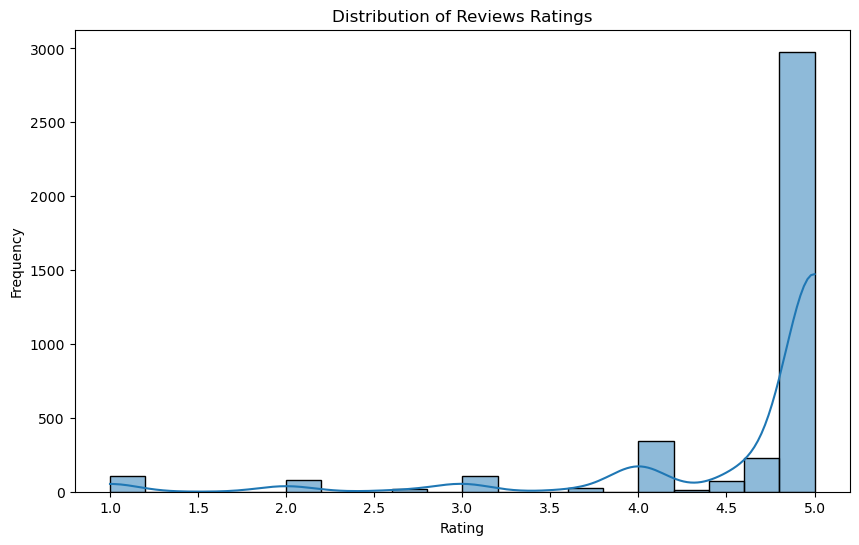

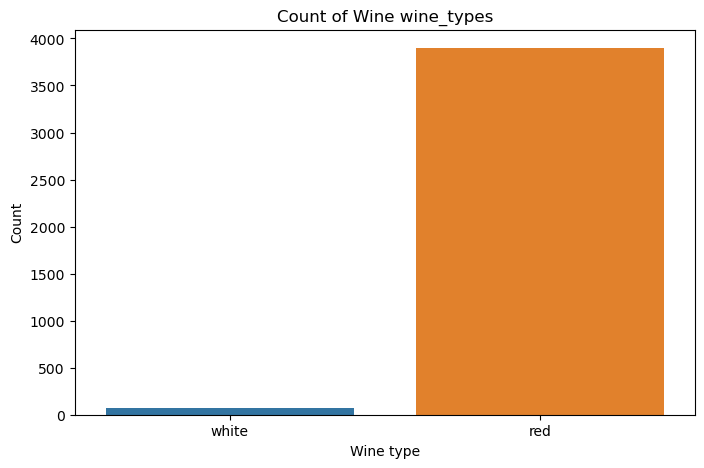

In [17]:
# Histogram of 'reviews.rating'
plt.figure(figsize=(10, 6))
sns.histplot(wine_clean_df['reviews.rating'], bins=20, kde=True)
plt.title('Distribution of Reviews Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Count plot of 'wine_type'
plt.figure(figsize=(8, 5))
sns.countplot(x='wine_type', data=wine_clean_df)
plt.title('Count of Wine wine_types')
plt.xlabel('Wine type')
plt.ylabel('Count')
plt.show()

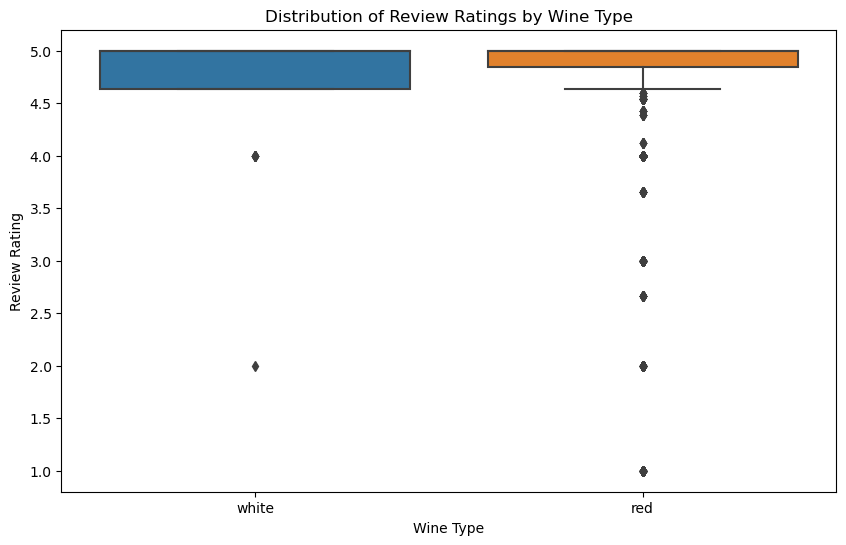

In [18]:
# Boxplot of 'reviews.rating' by 'wine_type'
plt.figure(figsize=(10, 6))
sns.boxplot(x='wine_type', y='reviews.rating', data=wine_clean_df)
plt.title('Distribution of Review Ratings by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('Review Rating')
plt.show()

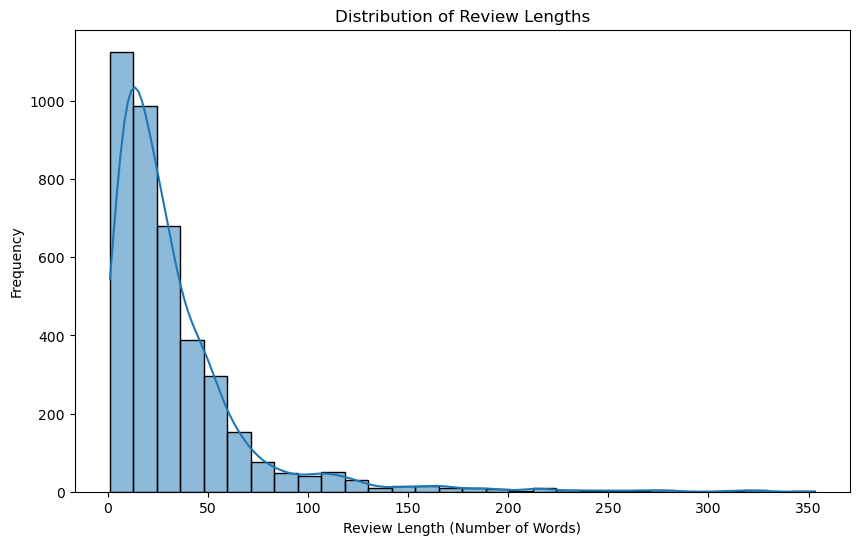

In [19]:
# Distribution of review lengths
review_lengths = wine_clean_df['reviews.text'].dropna().apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(review_lengths, bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()

In [20]:
# Calculate average review rating by brand
average_rating_by_brand = wine_clean_df.groupby('brand')['reviews.rating'].mean().sort_values(ascending=False)

# Create a DataFrame for the average ratings
average_rating_table = pd.DataFrame({'Brand': average_rating_by_brand.index, 'Average Rating': average_rating_by_brand.values})

# Display the table
print(average_rating_table)

                     Brand  Average Rating
0             1000 Stories             5.0
1                    EFFEN             5.0
2                   Risata             5.0
3          Fresh Craft Co.             5.0
4                  Riunite             5.0
..                     ...             ...
199             Skinnygirl             2.0
200              CRA-Z-ART             2.0
201                Regatta             2.0
202  Trademark Innovations             2.0
203   Skinnygirl Cocktails             2.0

[204 rows x 2 columns]


In [23]:
# Create a new DataFrame with the specified columns
wine_preprocessed = wine_clean_df[['brand', 'reviews.rating', 'reviews.text', 'reviews.title', 'reviews.username', 'wine_type', 'reviews.dateAdded']].copy()

# Save the DataFrame to a CSV file
wine_preprocessed.to_csv('wine_preprocessed.csv', index=False)